In [ ]:
# 1. Basic Setup

# Load your data
# Replace these with your actual data loading code
# train_data = pd.read_csv('path/to/train.csv')
# test_data = pd.read_csv('path/to/test.csv')
# model = load_your_model()

# 2. Model Performance Visualization

# 3. Feature Importance


# 4. Quick Recommendation Debugger

# 5. Cold Start Analysis (Simple Version)


# 6. Usage Example (Uncomment and modify as needed)
"""

# 2. Get predictions
#

# 3. Plot model performance
# 

# 4. Plot feature importance
# 

# 5. Debug a specific recommendation
# 

# 6. Check cold start performance
# 
"""




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc, precision_score, recall_score, f1_score


In [2]:
train_data = pd.read_csv('path/to/train.csv')
test_data = pd.read_csv('path/to/test.csv')
model = load_your_model()

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train.csv'

In [3]:
def plot_model_performance(y_true, y_scores, model_name="Model"):
    plt.figure(figsize=(15, 6))
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 1)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    
    # ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [4]:
def plot_feature_importance(model, feature_names, top_n=20):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = abs(model.coef_[0])
    else:
        print("Feature importance not available for this model")
        return
    
    # Create DataFrame for plotting
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False).head(top_n)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_imp)
    plt.title('Top Important Features')
    plt.tight_layout()
    plt.show()

In [5]:
def debug_recommendation(user_id, item_id, model, user_features, item_features):
    print(f"Debugging recommendation for User {user_id} and Item {item_id}")
    print("\nUser Features:")
    print(user_features.loc[user_id].describe())
    print("\nItem Features:")
    print(item_features.loc[item_id].describe())
    
    # Add prediction score if available
    if hasattr(model, 'predict_proba'):
        score = model.predict_proba(user_features.loc[[user_id], :])[0][1]
    else:
        score = model.predict(user_features.loc[[user_id], :])[0]
    print(f"\nPrediction Score: {score:.4f}")


In [6]:
def simple_cold_start_analysis(model, test_data, user_col='user_id', min_interactions=3):
    user_interactions = test_data[user_col].value_counts()
    cold_start_users = user_interactions[user_interactions <= min_interactions].index
    warm_users = user_interactions[user_interactions > min_interactions].index
    
    cold_mask = test_data[user_col].isin(cold_start_users)
    warm_mask = test_data[user_col].isin(warm_users)
    
    print(f"Cold Start Users: {len(cold_start_users)}")
    print(f"Warm Start Users: {len(warm_users)}")
    
    if len(cold_start_users) > 0:
        print("\nCold Start Performance:")
        y_true_cold = test_data.loc[cold_mask, 'target']
        y_pred_cold = model.predict(test_data.loc[cold_mask, :])
        print(f"Accuracy: {accuracy_score(y_true_cold, y_pred_cold):.4f}")
    
    if len(warm_users) > 0:
        print("\nWarm Start Performance:")
        y_true_warm = test_data.loc[warm_mask, 'target']
        y_pred_warm = model.predict(test_data.loc[warm_mask, :])
        print(f"Accuracy: {accuracy_score(y_true_warm, y_pred_warm):.4f}")

In [ ]:
# 1. Load your data
# train_data = pd.read_csv('path/to/train.csv')
# test_data = pd.read_csv('path/to/test.csv')
# model = load_your_model()


In [7]:
 y_scores = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

NameError: name 'model' is not defined

In [8]:
plot_model_performance(y_test, y_scores)

NameError: name 'y_test' is not defined

In [ ]:
(model, feaplot_feature_importanceture_names=X_train.columns)

In [ ]:
debug_recommendation(user_id=123, item_id=456, model=model, 
                     user_features=user_features, item_features=item_features)

In [ ]:
simple_cold_start_analysis(model, test_data)

In [ ]:
print("Analysis functions loaded. Uncomment and modify the usage example to get started!")

In [ ]:
python recommendation_analysis_fixed.py

Starting optimized recommendation system analysis...
Loading sample data...
Loaded 100000 rows

Preparing features...
Target distribution:
target
0    0.9973
1    0.0027
Name: proportion, dtype: float64
Final feature matrix shape: (100000, 25)

Training model...
Fitting model...

Model Performance:
Accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       0.00      0.00      0.00        54

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.99      1.00      1.00     20000



E:\HPLPGA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\HPLPGA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\HPLPGA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


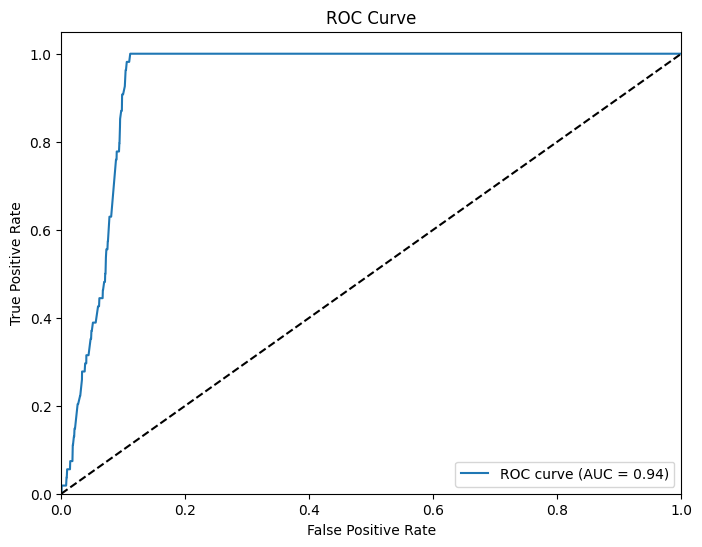

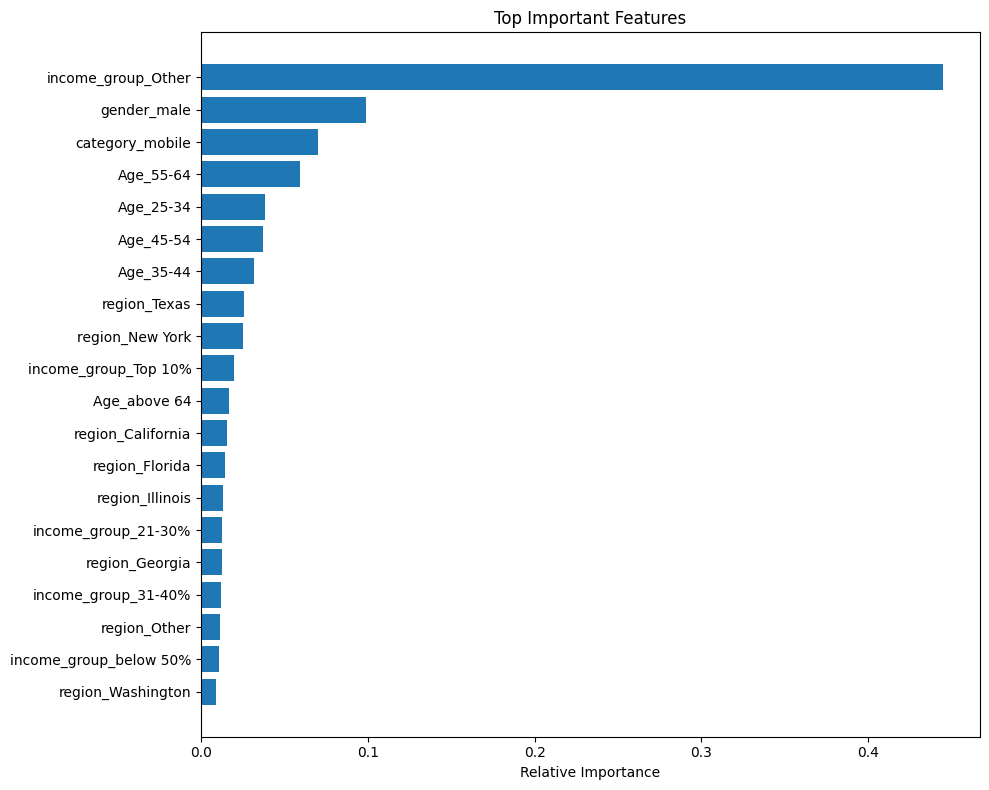


Analysis complete!


In [3]:
# recommendation_analysis_optimized.py

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def load_sample_data(sample_size=100000, random_state=42):
    """Load a sample of the data"""
    print("Loading sample data...")
    file_path = os.path.join('ecomm_personalization', 'backend', 'app', 'dataset1_final.csv')
    
    # Load only the columns we need
    usecols = ['event_name', 'category', 'region', 'gender', 'Age', 'income_group']
    df = pd.read_csv(file_path, usecols=usecols, low_memory=False)
    
    # Take a sample if the dataset is large
    if len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=random_state)
    
    print(f"Loaded {len(df)} rows")
    return df

def prepare_features(df):
    """Prepare features with memory efficiency in mind"""
    print("\nPreparing features...")
    df = df.copy()
    
    # Create target (1 for purchase, 0 otherwise)
    df['target'] = (df['event_name'] == 'purchase').astype(np.int8)
    print("Target distribution:")
    print(df['target'].value_counts(normalize=True))
    
    # Select and process features
    cat_cols = ['category', 'region', 'gender', 'Age', 'income_group']
    
    # Reduce cardinality of high-cardinality columns
    for col in cat_cols:
        if col in df.columns:
            # Keep top N categories, rest as 'Other'
            top_cats = df[col].value_counts().nlargest(10).index
            df[col] = df[col].where(df[col].isin(top_cats), 'Other')
    
    # Create dummy variables
    X = pd.get_dummies(df[cat_cols], drop_first=True, dtype=np.int8)
    y = df['target']
    
    print(f"Final feature matrix shape: {X.shape}")
    return X, y

def train_and_evaluate(X, y, test_size=0.2, random_state=42):
    """Train and evaluate a model with reduced memory usage"""
    print("\nTraining model...")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Use a simpler model with less memory
    model = RandomForestClassifier(
        n_estimators=50,  # Reduced number of trees
        max_depth=10,     # Limit tree depth
        min_samples_leaf=10,  # Increase to prevent overfitting
        n_jobs=-1,        # Use all cores
        random_state=random_state
    )
    
    print("Fitting model...")
    model.fit(X_train, y_train)
    
    # Evaluate
    print("\nModel Performance:")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, X_test, y_test, y_proba

def plot_roc_curve(y_true, y_proba, title='ROC Curve'):
    """Plot ROC curve"""
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_feature_importance(model, feature_names, top_n=20):
    """Plot top N feature importances"""
    if not hasattr(model, 'feature_importances_'):
        print("Feature importance not available for this model")
        return
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    
    plt.figure(figsize=(10, 8))
    plt.title('Top Important Features')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

def main():
    print("Starting optimized recommendation system analysis...")
    
    # 1. Load and prepare data
    df = load_sample_data(sample_size=100000)  # Adjust sample size as needed
    X, y = prepare_features(df)
    
    # 2. Train and evaluate model
    model, X_test, y_test, y_proba = train_and_evaluate(X, y)
    
    # 3. Plot results
    plot_roc_curve(y_test, y_proba)
    plot_feature_importance(model, X.columns)
    
    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()